# Edex 2: Estimate gas permeability through polymer membranes from chemical structure

## Problem Statement and Motivations
In this edex, we'll be testing a few regression models to link chemical structure to a property.

#### Goal: 
Estimate the ideal single-gas permeability through a polymer membrane using the chemical structure of the repeating unit. A database of empirical data from ~300 papers is provided in accompanying excel spreadsheet "Perm_Data.xlsx"

#### Motivation: 
This is another opportunity to study a structure-property relationship, though it requires a different tool than last time. Since we want our model output to be a continuous numerical value, we will use regression. A successful regression model here enables fast prediction of an otherwise arduous lab experiment, as well as easy screening of cutting-edge materials for gas separations. 

#### Relevant Materials Science Background:
- As climate change mounts in intensity, climate-friendly methods for chemical separations grow increasingly necessary. Membrane-based separations require far less energy than distillation, but are less understood in comparison. Testing different formulations takes time and effort, thus a high-throughput tool to screen materials for desired gas separation capabilities is highly valuable. 
- Polymers are made up of repeating units of atoms, which in this case are subtly different from "monomers". Whereas monomers are the compounds that undergo reaction to yield the eventual polymer, repeat units are the actual structures that constitute the polymer chain. 
- Studies in the literature have found success in group contribution methods. These involve empirically calculating moiety-specific contributions to the overall compound's permeability over several cases, such that any polymer's permeability could be estimated as a sum of of its parts. For more information, see the following:


#### Papers:

Background:\
[1]	Park, Ho Bum, et al. “Maximizing the Right Stuff: The Trade-off between Membrane Permeability and Selectivity.” Science, vol. 356, June 2017.

ML Context:\
[2]	Barnett, J. Wesley, et al. “Designing Exceptional Gas-Separation Polymer Membranes Using Machine Learning.” Science Advances, vol. 6, no. 20, 2020, doi:10.1126/sciadv.aaz4301.

Group Contribution Theory:\
[3]	Robeson, L. “A Group Contribution Approach to Predict Permeability and Permselectivity of Aromatic Polymers.” Journal of Membrane Science, vol. 132, no. 1, 1997, pp. 33–54., doi:10.1016/s0376-7388(97)00031-8.

## Framing the Problem in ML

This problem explores the other half of supervised learning. Regression maps an input variable to a prediction. This can be as simple as lines of best fit, but ML versions can get far more sophisticated. In order to use regression for our purposes here, we will need to vectorize a chemical structure to construct a numerical input for our model. 

In this example, we implement the fingerprinting methods from the RDKit python module to encode chemical structures on several size scales. The result is a vector of a prescribed length with binary values. Topological fingerprints will have 2,048 bits, or indices in the vector, while MACCS keys will have 167. These will form an input matrix of size NxM, where N is the number of polymers and M is the length of the fingerprint vector. Our output will be an array of size Nx1, containing permeability predictions for each polymer. The number of polymers will vary by gas due to data availability in the literature. 

### Import libraries

Begin by importing the necessarypython packages. If any are not installed, check their documentation for installation guides using either pip or conda. 

For additional models, you will need to import additional libraries of your own choosing. 

In [ ]:
import pandas as pd
import numpy as np
import copy
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Preprocessing

Import the data from "Perm_Data.xlsx".

Make sure your excel file is in the same folder as this notebook file so you can directly import it. This file contains gas permeabilities for a few hundred polymers, as well as the chemical information stored in SMILES strings (more on this below). 

Note that the master dataframe has several blank columns and NaN (not a number) entries. The NaNs are due to certain papers having data avilable for only a few gases out of the six studied here. To proceed, we will need to clean the data up a bit.

In [ ]:
data = pd.read_excel('Perm_Data.xlsx')
data.head(5)

Column 0: Polymer names\
Column 1: SMILES string format\
Columns 2-7: Permeability values for each gas\
Columns 8-9: Experimental operating temperature and pressure

SMILES is a text-based format which encodes the atoms present in a molecule (here the molecules are the repeating units of the polymer, capped on either end with hydrogens) and how they're connected. This is one of the easiest ways to get the computer to understand what molecule you're looking at. 

In [ ]:
# Split name and strings into gas-specific datasets
He_data = data.loc[:,["Polymer", "SMILES", "He"]]
H2_data = data.loc[:,["Polymer", "SMILES", "H2"]]
CO2_data = data.loc[:,["Polymer", "SMILES", "CO2"]]
O2_data = data.loc[:,["Polymer", "SMILES", "O2"]]
N2_data = data.loc[:,["Polymer", "SMILES", "N2"]]
CH4_data = data.loc[:,["Polymer", "SMILES", "CH4"]]

In [ ]:
CH4_data.head(5)

## Clean dataframes with helper function

Create a function which takes a pandas dataframe as an input, cleans it, and returns it. Your function should drop all rows where at least one element is missing (since not knowing the polymer's name, structure, or permeability would make that point useless), as well as drop all duplicate entries for the same polymer. Across multiple papers, some polymers are repeated, so you might consider dropping duplicates by subsetting the SMILES column. Once your function is written, apply it to each gas-specific dataset and preview the final dataframe to check for correctness. 

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
def clean_df(df):
    
    #gets rid of NaN (not a number) entries in the dataframes


    # Drop duplicate SMILES rows (repeated entries from separate papers)
  

    return df

In [ ]:
He_data = clean_df(He_data)

H2_data = clean_df(H2_data)

CO2_data = clean_df(CO2_data)

O2_data = clean_df(O2_data)

N2_data = clean_df(N2_data)

CH4_data = clean_df(CH4_data)

In [ ]:
# Preview cleaned data as a safety check
O2_data.head(10)

## Visualize entries in the dataframe
To get the molecule in a usable format, we have to create a mol object. This is most easily done using the SMILES strings from the second column in the above dataframes. RDKit has a function in the Chem module called "MolFromSmiles" to do this. The mol object's methods will report some useful information in a convenient way, as well as enable the vectorization of the molecule for regression purposes.

First, use Chem.MolFromSmiles() to get a mol object out of a SMILES string (which you can get from any dataframe above using the [Gas]_data.iloc[] function). Whatever variable you store your mol object in, simply type the name of the variable again in a new line to show the image of the molecule. In the following cell, use the mol.GetAtoms() method and loop over each atom in the resulting list to print each atom's atomic number in the molecule.

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Get a mol object from the SMILES string in row 0, column 1 (polyaniline)
mol = 

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Print atomic number of each atom in the mol object


# Calculate fingerprints from mol objects

Now we want to make a fixed-length vector format for each polymer for regression operations to go smoothly. The helper function `calculate_fingerprint` below will calculate a 2,048-bit binary vector for any input mol object. This vector, specifically the Daylight-like topological fingerprint, encodes chemical structures fragment by fragment. For more information, see the link below:

https://rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf \

There are several methods of calculating the fingerprint, such as morgan fingerprints, MACCS keys, etc. While rdkfingerprint and morgan are the most common, they may present instances of bit collision, where multiple chemical patterns map to the same index of the vector. For this reason, we also consider using MACCS keys to trade some index-level molecular detail for robust index-level detail. The function `get_MACCS` below calculates the MACCS key vector for a given mol object. MACCS keys are always fixed, so no bit collisions will occur. The MACCS key descriptors are located at the following link:

https://github.com/rdkit/rdkit/blob/master/rdkit/Chem/MACCSkeys.py

In [ ]:
def calculate_fingerprint(mol):
    fps = [] # Initialize empty array to store fingerprint
    arr = np.zeros((1,)) # Zero vector to create fingerprint
    # Defaults are minPath=1,maxPath=7,fpSize=2048,bitsPerHash=2,useHs=True,tgtDensity=0.0 defaults   
    fp_temp = Chem.RDKFingerprint(mol, minSize=128) # Calculate fingerprint
    DataStructs.ConvertToNumpyArray(fp_temp, arr) # Swap fingerprint values into zero array
    fps.append(arr) # Store fingerprint into array
    
    return fps

def get_MACCS(mol):
    fp = MACCSkeys.GenMACCSKeys(mol) # Generate MACCS key vector
    fp = fp.ToBitString()
    fp = np.fromiter(fp, float) # This line here is just to save a headache or two
    return fp

Test the functions in the cells below by creating first a topological fingerprint, then a MACCS key vector. Print the length of each fingerprint to ensure they contain the correct number of bits.

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Test function on mol example from above


# Print the length of the fingerprint


#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Example of MACCS keys, test on mol from above and print length


# Create an array of fingerprints for one gas
Input the name of the dataframe you want to work with in the cell below to switch between gas-specific datasets.

In [ ]:
# Use a deep copy to avoid overwriting the original dataframe since python does that sometimes
ML_data = O2_data.copy(deep=True)

The cell below will create an N x 2048 array of 1's and 0's. Each row is one polymer in your dataset. The cell prints the index of the polymer it's on so you can see which polymers, if any, cause issues.

In [ ]:
# Start array with the 0th (first) molecule in the dataframe

mol_init = Chem.MolFromSmiles(ML_data.iloc[0,1])
fp = calculate_fingerprint(mol_init)

# Create database of fingerprints by stacking subsequent fingerprints
for i in range(1, len(ML_data)):
    try:
        mol_temp = Chem.MolFromSmiles(ML_data.iloc[i,1])
        fp_temp = calculate_fingerprint(mol_temp)
    except:
        print("Error getting fingerprint")
    fp = np.vstack([fp, fp_temp])
    print(i)
    

# Set data up for model training

Regression operations generally take the form below, where X is an array of data, w is a vector of learned parameters, and y is a vector of target values (permeability for this case). This equation can be read as minimizing the gap between the model prediction (matrix multiplication Xw) and actual values (y) by changing w, penalizing the square of deviations. The second term is scaled by a generic hyperparameter $\lambda$, with the blank placeholder allowing for variations like Ridge regression. 

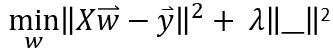

Below, we prepare the X matrix and y vector for use in generic scikitlearn regression models. Keep an eye on the size of each component and make sure they match, as this can save you from mistakes. These are matrix operations, so problems will stand out.

In [ ]:
print(len(fp))
print('--------------------------------------------------')
print(fp)

## Make sure the gas noted below matches your dataframe selection above from the 'Create an array of fingerprints for one gas' section

In [ ]:
perms = ML_data['O2'].values
print(len(perms))
print('--------------------------------------------------')
print(perms)

Note that the permeability values are quite varied. Typically they are handled in base-10 logarithm forms in membranes research. This shrinks the range of the data, making it more tractable for model fitting as well. Now we'll split the dataset into a training set and a testing set, taking the log of the y data so we don't have to worry about that later. Ratios may vary, but somewhere around 80/20 is generally safe.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(fp, np.log10(perms), train_size=0.8, random_state=0)

## Example: Linear Regression
Most scikitlearn models have the same flow. You start by initializing the model, often times setting the random state option (you'll see this in plenty of other models as you start to use more) to some routine value (any integer you like) just for good practice. This makes sure any random shuffles are exactly the same on later trials for reproducability.

Next, you fit the model to your data, usually with `[model].fit(X_train, y_train)`, but recall that our `y_train` is actually `np.log10(y_train)`, so model predictions will also be in $log_{10}$ form. To evaluate performance, there are a few options. You can start by checking the $R^{2}$ value, the coefficient of determination. This number tells you how much of your data's variance is captured by the model. Always check both training scores and testing scores. If training scores are significantly higher than testing, you may have overfit the model to the training data, in which case the model may generalize poorly to outside data. 

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
print('Training score: ' + str(linreg.score(X_train, y_train)))
print('Testing score: ' + str(linreg.score(X_test, y_test)))

To see how the model's performance looks on a more detailed level, we can try parity plots and/or getting a histogram of deviations between model prediction and actual values. First, we'll need to run model predictions on our testing set fingerprints $X_{test}$. 

In [ ]:
y_pred = linreg.predict(X_test)
print(len(y_pred))
print(len(y_test))

A parity plot is just a scatter of $y_{pred}$ versus $y_{test}$. These should ideally form a line along the y=x diagonal, meaning that every prediction is more or less spot-on with the actual value in the test set, but you will have some fluctuations. 

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('$y_{test}$')
plt.ylabel('$y_{pred}$')
plt.grid(True)

In [ ]:
errors = y_test - y_pred
plt.figure(figsize=(8,8))
plt.hist(errors, bins=20, color='blue',  density=True)
plt.xlabel('Error [$log_{10}$ space]')
plt.ylabel('Frequency')
plt.title('Linear Model Errors');

### Quite a few data points are off by huge margins (remember the log scale). Why might this be happening? What can we do about this? Evidently, linear models won't suffice here.

# Try a few other models

For ideas on what types exist, check out scikit learn's website here:
https://scikit-learn.org/stable/user_guide.html

Regression falls under supervised learning, so feel free to explore that whole area. Searching "regression" in the top right corner of the page will bring up more options than initially displayed on that page (such as sklearn.neural_network.MLPRegressor). Note that most pages will have a working code example if you scroll down in case you're having difficulty getting one to work. See which types of models give better performance and consider why that might be the case. Other models can be found in different python packages if you're feeling adventurous.

# Model 1: _____

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Model fitting block


In [ ]:
# Scoring block


In [ ]:
# Parity plot


# Model 2: _____

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Model fitting block


In [ ]:
# Scoring block


In [ ]:
# Parity plot


# Model 3: _____

#### <font color='RED'>YOUR SOLUTION:</font> 

In [ ]:
# Model fitting block


In [ ]:
# Scoring block


In [ ]:
# Parity plot
